Constant definitions as from the example code.

In [1]:
#
#    IMPORTS
# 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt


#    Import some standard python modules
import os, json, time
#
#    The module pyproj is a standard module that can be installed using pip or your other favorite
#    installation tool. This module provides tools to convert between different geodesic coordinate systems
#    and for calculating distances between points (coordinates) in a specific geodesic system.
#
from pyproj import Transformer, Geod
#
#    The 'wildfire' module is a user module. This module is available from the course website. The module
#    includes one object, a Reader, that can be used to read the GeoJSON files associated with the
#    wildefire dataset. The module also contains a sample datafile that is GeoJSON compliant and that
#    contains a small number of wildfires extracted from the main wildfire dataset.
#    
from wildfire.Reader import Reader as WFReader
#
#    There is a GeoJSON reader that you might try if you wanted to read the data. It has its own quirks.
#    There will be an example below that reads the sample file "Wildfire_short_sample.json"
#    
import geojson
#

We modified the sample code to get the documented behaviors.

In [9]:
#
#    CONSTANTS
#

#
#    The 'Wildfire_short_sample_2024.json' is an extraction from the full 'USGS_Wildland_Fire_Combined_Dataset.json'
#    dataset extracting several major wildfires in California, plus a couple others that have interested data structure
#    features. 
#
#    The sample file includes data for 15 fires, mostly oriented around the uniqueness of the name. Naming conventions
#    for wildfires is really adhoc, which makes finding any named fire in the dataset a disambiguation mess. The named
#    fires were selected from https://en.wikipedia.org/wiki/List_of_California_wildfires
#
#    The point nof the sample is to provide something small to test with before committing to processing the, much 
#    larger, full dataset.
#
EXTRACT_FILENAME = "Wildfire_short_sample_2024.json"
#
#    The user module 'wildfire' contains a Reader object and the sample data. This bit of code finds where that is
#    located on your machine and constructs a path so that the sample data can be loaded. This assumes you have set 
#    a PYTHONPATH environment variable to point to the location on your machine where you store python user modules.
#
#    NOTE: if you use Anaconda for virtual python environments, Anaconda will adhere to the PYTHONPATH conventions
#    for user modules.
#
MODULENAME = "wildfire"
MODULEPATH = ""
    # try:
    #     ppath = os.environ.get('PYTHONPATH')
    #     if not ppath: raise
    #     MODULEPATH = os.path.join(ppath,MODULENAME)
    # except:
    #     # Likely here because a PYTHONPATH was not set, show a warning message
    #     print("Looks like you're not using a 'PYTHONPATH' to specify the location of your python user modules.")
    #     print("You may have to modify the sample code in this notebook to get the documented behaviors.")
    #     MODULEPATH = ""

    # if MODULEPATH:
    #     SAMPLE_DATA_FILENAME = os.path.join(MODULEPATH,EXTRACT_FILENAME)
    # else:
    #     SAMPLE_DATA_FILENAME = EXTRACT_FILENAME
#

MODULEPATH = "wildfire"  
SAMPLE_DATA_FILENAME = os.path.join(MODULEPATH, EXTRACT_FILENAME)

# print out where we think we're going to find the sample data
print(f"{SAMPLE_DATA_FILENAME=}")

#
#    A dictionary of some city locations from the US west coast states.
#
CITY_LOCATIONS = {
    'anchorage' :     {'city'   : 'Anchorage',
                       'latlon' : [61.2176, -149.8997] },
    'ocean_shores' :  {'city'   : 'Ocean Shores',    
                       'latlon' : [47.0074, -124.1614] },
    'seaside' :       {'city'   : 'Seaside',
                       'latlon' : [45.9932, -123.9226] }, 
    'bend' :          {'city'   : 'Bend',
                       'latlon' : [44.0582, -121.3153] }, 
    'medford' :       {'city'   : 'Medford',
                       'latlon' : [42.3265, -122.8756] }, 
    'crescent_city' : {'city'   : 'Crescent City',
                       'latlon' : [41.7558, -124.2026] }, 
    'tomales' :       {'city'   : 'Tomales',
                       'latlon' : [38.2411, -122.9033] }, 
    'barstow' :       {'city'   : 'Barstow',
                       'latlon' : [34.8958, -117.0173] }, 
    'redding' :       {'city'   : 'Redding',
                       'latlon' : [40.5865, -122.3916] }, 
    'encinitas' :     {'city'   : 'Encinitas',
                       'latlon' : [33.0370, -117.2920] },
    'loveland' :      {'city'   : 'Loveland',
                       'latlon' : [40.398857, -105.052643] }
}


SAMPLE_DATA_FILENAME='wildfire/Wildfire_short_sample_2024.json'


We load the wildfire data using the GeoJSON module following example 1.

In [10]:
#
#    Open a file, load it with the geojson loader
#
print(f"Attempting to open '{SAMPLE_DATA_FILENAME}'")
geojson_file = open(SAMPLE_DATA_FILENAME,"r")
print(f"Using GeoJSON module to load sample file '{SAMPLE_DATA_FILENAME}'")
gj_data = geojson.load(geojson_file)
geojson_file.close()
#
#    Print the keys from the object
#
gj_keys = list(gj_data.keys())
print("The loaded JSON dictionary has the following keys:")
print(gj_keys)
print()
#
#    For all GeoJSON type things, the most important part of the file are the 'features'. 
#    In the case of the wildfire dataset, each feature is a polygon (ring) of points that define the bounary of a fire
#
count = 0
for feature in gj_data['features']:
    count += 1
    #print(json.dumps(feature,indent=4))
    time.sleep(0.5)   # this slows the output to fix output rate limits for Jupyter

print(f"Found {count} features in the variable 'gj_data' ")
#

Attempting to open 'wildfire/Wildfire_short_sample_2024.json'
Using GeoJSON module to load sample file 'wildfire/Wildfire_short_sample_2024.json'
The loaded JSON dictionary has the following keys:
['displayFieldName', 'fieldAliases', 'geometryType', 'spatialReference', 'fields', 'features']

Found 15 features in the variable 'gj_data' 


In [11]:
#
#    Get the first item in the list of features
#
SLOT = 0
gj_feature = gj_data['features'][SLOT]
#
#    Print everyting in this dictionary (i.e., gj_feature) - it's long
#
print(f"The wildfire feature from slot '{SLOT}' of the loaded gj_data['features']")
print(json.dumps(gj_feature, indent=4))


The wildfire feature from slot '0' of the loaded gj_data['features']
{
    "attributes": {
        "OBJECTID": 4956,
        "USGS_Assigned_ID": 4956,
        "Assigned_Fire_Type": "Wildfire",
        "Fire_Year": 1932,
        "Fire_Polygon_Tier": 1,
        "Fire_Attribute_Tiers": "1 (1), 3 (3)",
        "GIS_Acres": 219999.23754748085,
        "GIS_Hectares": 89030.53273921262,
        "Source_Datasets": "Comb_National_NIFC_Interagency_Fire_Perimeter_History (1), Comb_National_USFS_Final_Fire_Perimeter (1), Comb_National_WFDSS_Interagency_Fire_Perimeter_History (1), Comb_State_California_Wildfire_Polygons (1)",
        "Listed_Fire_Types": "Wildfire (3), Likely Wildfire (1)",
        "Listed_Fire_Names": "MATILIJA (4)",
        "Listed_Fire_Codes": "No code provided (4)",
        "Listed_Fire_IDs": "0 (3)",
        "Listed_Fire_IRWIN_IDs": "",
        "Listed_Fire_Dates": "Listed Wildfire Discovery Date(s): 1932-09-07 (2) | Listed Other Fire Date(s): 1899-12-30 - REVDATE field (1), 

In [12]:
#    Every feature has a 'geometry' which specifies geo coordinates that make up each geographic thing
#    In the case of the wildfire data, most wildfires are bounded shapes, circles, squares, etc. This is
#    represented by shapes called 'rings' in GeoJSON.
# 
# Get the geometry for the feature we pulled from the feature_list
gj_geometry = gj_feature['geometry']
# The largest shape (ring) is supposed to be item zero in the list of 'rings'
gj_bigest_ring = gj_geometry['rings'][0]

print(f"The largest ring of gj_feature['features'][{SLOT}]['rings'] consists of {len(gj_bigest_ring)} points.")

The largest ring of gj_feature['features'][0]['rings'] consists of 1132 points.


We load the wildfire data using the wildfire Reader object following example 2.

In [13]:
#
#    This bit of code opens a new wildfire reader, gets the header information and prints it to the screen
#
print(f"Attempting to open '{SAMPLE_DATA_FILENAME}' with wildfire.Reader() object")
wfreader = WFReader(SAMPLE_DATA_FILENAME)
print()
#
#    Now print the header - it contains some useful information
#
header_dict = wfreader.header()
header_keys = list(header_dict.keys())
print("The header has the following keys:")
print(gj_keys)
print()
print("Header Dictionary")
print(json.dumps(header_dict,indent=4))


Attempting to open 'wildfire/Wildfire_short_sample_2024.json' with wildfire.Reader() object

The header has the following keys:
['displayFieldName', 'fieldAliases', 'geometryType', 'spatialReference', 'fields', 'features']

Header Dictionary
{
    "displayFieldName": "",
    "fieldAliases": {
        "OBJECTID": "OBJECTID",
        "USGS_Assigned_ID": "USGS Assigned ID",
        "Assigned_Fire_Type": "Assigned Fire Type",
        "Fire_Year": "Fire Year",
        "Fire_Polygon_Tier": "Fire Polygon Tier",
        "Fire_Attribute_Tiers": "Fire Attribute Tiers",
        "GIS_Acres": "GIS_Acres",
        "GIS_Hectares": "GIS_Hectares",
        "Source_Datasets": "Source Datasets",
        "Listed_Fire_Types": "Listed Fire Types",
        "Listed_Fire_Names": "Listed Fire Names",
        "Listed_Fire_Codes": "Listed Fire Codes",
        "Listed_Fire_IDs": "Listed Fire IDs",
        "Listed_Fire_IRWIN_IDs": "Listed Fire IRWIN IDs",
        "Listed_Fire_Dates": "Listed Fire Dates",
        "L

In [14]:
#
#    This sample code will load the whole sample (extracted data) file, or a small amount of the complete dataset.
#
MAX_FEATURE_LOAD = 100
feature_list = list()
feature_count = 0
# A rewind() on the reader object makes sure we're at the start of the feature list
# This way, we can execute this cell multiple times and get the same result 
wfreader.rewind()
# Now, read through each of the features, saving them as dictionaries into a list
feature = wfreader.next()
while feature:
    feature_list.append(feature)
    feature_count += 1
    # if we're loading a lot of features, print progress
    if (feature_count % 100) == 0:
        print(f"Loaded {feature_count} features")
    # loaded the max we're allowed then break
    if feature_count >= MAX_FEATURE_LOAD:
        break
    feature = wfreader.next()
#
#    Print the number of items (features) we think we loaded
print(f"Loaded a total of {feature_count} features")
#
#    Just a validation check - did all the items we loaded get into the list?
print(f"Variable 'feature_list' contains {len(feature_list)} features")




Loaded a total of 15 features
Variable 'feature_list' contains 15 features


In [15]:
#
#    The 'feature_list' variable was created when we read the sample file in a code cell above
#    Now, we're just going to look at one single feature - see what is in there
#
SLOT = 0
wf_feature = feature_list[SLOT]

# Print everyting in this dictionary (i.e., wf_feature) - it's long
print(f"The wildfire feature from slot '{SLOT}' of the loaded 'feature_list'")
print(json.dumps(wf_feature, indent=4))


The wildfire feature from slot '0' of the loaded 'feature_list'
{
    "attributes": {
        "OBJECTID": 4956,
        "USGS_Assigned_ID": 4956,
        "Assigned_Fire_Type": "Wildfire",
        "Fire_Year": 1932,
        "Fire_Polygon_Tier": 1,
        "Fire_Attribute_Tiers": "1 (1), 3 (3)",
        "GIS_Acres": 219999.23754748085,
        "GIS_Hectares": 89030.53273921262,
        "Source_Datasets": "Comb_National_NIFC_Interagency_Fire_Perimeter_History (1), Comb_National_USFS_Final_Fire_Perimeter (1), Comb_National_WFDSS_Interagency_Fire_Perimeter_History (1), Comb_State_California_Wildfire_Polygons (1)",
        "Listed_Fire_Types": "Wildfire (3), Likely Wildfire (1)",
        "Listed_Fire_Names": "MATILIJA (4)",
        "Listed_Fire_Codes": "No code provided (4)",
        "Listed_Fire_IDs": "0 (3)",
        "Listed_Fire_IRWIN_IDs": "",
        "Listed_Fire_Dates": "Listed Wildfire Discovery Date(s): 1932-09-07 (2) | Listed Other Fire Date(s): 1899-12-30 - REVDATE field (1), 1932-

In [16]:
#
#    Every feature has a 'geometry' which specifies geo coordinates that make up each geographic thing
#    In the case of the wildfire data, most wildfires are bounded shapes, circles, squares, etc. This is
#    represented by shapes called 'rings' in GeoJSON.
# 
# Get the geometry for the feature we pulled from the feature_list
wf_geometry = wf_feature['geometry']
# The largest shape (ring) is supposed to be item zero in the list of 'rings'
wf_bigest_ring = wf_geometry['rings'][0]

print(f"The largest ring of wf_feature['features'][{SLOT}]['rings'] consists of {len(wf_bigest_ring)} points.")

The largest ring of wf_feature['features'][0]['rings'] consists of 1132 points.


We compute distance with Pyproj following example 3.

In [17]:
#
#    First create a geodesic model that will be used for the calculations. There are a number of
#    different models of the earth. The WSG84 is one that is commonly used and relatively up-to-date
#
#geodcalc = Geod(ellps='clrk66')       # Use Clarke 1866 ellipsoid representation of the earth
geodcalc = Geod(ellps='WGS84')         # Use WGS84 ellipsoid representation of the earth

#    Two constants for accessing the 'latlon' array in our CITY_LOCATIONS constant dict
LAT = 0
LON = 1
#    Get a city from our CITY_LOCATIONS constant as our starting position
start_at = CITY_LOCATIONS["medford"]
start_at = CITY_LOCATIONS["redding"]
start_at = CITY_LOCATIONS["loveland"]

#    Loop through all of the cities to calculate the distance from the starting position
for city_key in CITY_LOCATIONS.keys():
    #    City destination
    destination = CITY_LOCATIONS[city_key]
    #    Note that the 'inv()' function wants coordinates in Longitude,Latitude order by default
    #    inv() also allows lat and lon parameters to be vectors/arrays - in which case the results would be vector/arrarys
    distance = geodcalc.inv(start_at['latlon'][LON],start_at['latlon'][LAT],destination['latlon'][LON],destination['latlon'][LAT])
    #    The 'distance' result variable is a tuple/list with the first two items reflecting forward/backward azimuths
    #    and the third item representing the distance in meters. 
    d_meters = distance[2]
    d_miles = d_meters * 0.00062137 # constant to convert meters to miles
    #    BTW, this isn't actually a 'straight' line because the whole reason for using pyproj is to calculate
    #    these distance measures over the surface of a sphere/ellipsoid. We set up which ellipsoid to use when we
    #    defined the 'geodcalc' object near the top of this cell
    print(f"Straight line distance from {start_at['city']} to {destination['city']} is {d_meters} meters or {d_miles:5.2f} miles")



Straight line distance from Loveland to Anchorage is 3800330.933788066 meters or 2361.41 miles
Straight line distance from Loveland to Ocean Shores is 1700334.6351250918 meters or 1056.54 miles
Straight line distance from Loveland to Seaside is 1649822.3613664224 meters or 1025.15 miles
Straight line distance from Loveland to Bend is 1400008.5319638762 meters or 869.92 miles
Straight line distance from Loveland to Medford is 1503732.3001080346 meters or 934.37 miles
Straight line distance from Loveland to Crescent City is 1612979.0529373728 meters or 1002.26 miles
Straight line distance from Loveland to Tomales is 1555123.1658472163 meters or 966.31 miles
Straight line distance from Loveland to Barstow is 1218224.6806120276 meters or 756.97 miles
Straight line distance from Loveland to Redding is 1467713.6260297254 meters or 911.99 miles
Straight line distance from Loveland to Encinitas is 1362736.6411465146 meters or 846.76 miles
Straight line distance from Loveland to Loveland is 0.0

We set out city to Renton, WA

In [18]:
CITY_LOCATIONS['renton'] = {
    'city': 'Renton',
    'latlon': [47.48, -122.19]
}

In [19]:
#
#    Transform feature geometry data
#
#    The function takes one parameter, a list of ESRI:102008 coordinates that will be transformed to EPSG:4326
#    The function returns a list of coordinates in EPSG:4326
def convert_ring_to_epsg4326(ring_data=None):
    converted_ring = list()
    #
    # We use a pyproj transformer that converts from ESRI:102008 to EPSG:4326 to transform the list of coordinates
    to_epsg4326 = Transformer.from_crs("ESRI:102008","EPSG:4326")
    # We'll run through the list transforming each ESRI:102008 x,y coordinate into a decimal degree lat,lon
    for coord in ring_data:
        lat,lon = to_epsg4326.transform(coord[0],coord[1])
        new_coord = lat,lon
        converted_ring.append(new_coord)
    return converted_ring

In [20]:
#
#   Convert one ring from the default to EPSG
#
#   There are two options here - depending upon whether you loaded data useing GeoJSON or the wildfire.Reader
#
# ring_in_epsg4326 = convert_ring_to_epsg4326(gj_bigest_ring)
#
ring_in_epsg4326 = convert_ring_to_epsg4326(wf_bigest_ring)
#
print(f"Ring consists of {len(ring_in_epsg4326)} points.")
#
#    If you want to print them out you can see what they look like converted.
#print(ring_in_epsg4326)
#for point in ring_in_epsg4326:
#    print(f"{point[0]},{point[1]}")


Ring consists of 1132 points.


We compute distance between a place and a wildfire following example 5.

In [21]:
#    
#    The function takes two parameters
#        A place - which is coordinate point (list or tuple with two items, (lat,lon) in decimal degrees EPSG:4326
#        Ring_data - a list of decimal degree coordinates for the fire boundary
#
#    The function returns a list containing the shortest distance to the perimeter and the point where that is
#
def shortest_distance_from_place_to_fire_perimeter(place=None,ring_data=None):
    # convert the ring data to the right coordinate system
    ring = convert_ring_to_epsg4326(ring_data)    
    # create a epsg4326 compliant object - which is what the WGS84 ellipsoid is
    geodcalc = Geod(ellps='WGS84')
    closest_point = list()
    # run through each point in the converted ring data
    for point in ring:
        # calculate the distance
        d = geodcalc.inv(place[1],place[0],point[1],point[0])
        # convert the distance to miles
        distance_in_miles = d[2]*0.00062137
        # if it's closer to the city than the point we have, save it
        if not closest_point:
            closest_point.append(distance_in_miles)
            closest_point.append(point)
        elif closest_point and closest_point[0]>distance_in_miles:
            closest_point = list()
            closest_point.append(distance_in_miles)
            closest_point.append(point)
    return closest_point



#    
#    The function takes two parameters
#        A place - which is coordinate point (list or tuple with two items, (lat,lon) in decimal degrees EPSG:4326
#        Ring_data - a list of decimal degree coordinates for the fire boundary
#
#    The function returns the average miles from boundary to the place
#
def average_distance_from_place_to_fire_perimeter(place=None,ring_data=None):
    # convert the ring data to the right coordinate system
    ring = convert_ring_to_epsg4326(ring_data)    
    # create a epsg4326 compliant object - which is what the WGS84 ellipsoid is
    geodcalc = Geod(ellps='WGS84')
    # create a list to store our results
    distances_in_meters = list()
    # run through each point in the converted ring data
    for point in ring:
        # calculate the distance
        d = geodcalc.inv(place[1],place[0],point[1],point[0])
        distances_in_meters.append(d[2])
    #print("Got the following list:",distances_in_meters)
    # convert meters to miles
    distances_in_miles = [meters*0.00062137 for meters in distances_in_meters]
    # the esri polygon shape (the ring) requires that the first and last coordinates be identical to 'close the region
    # we remove one of them so that we don't bias our average by having two of the same point
    distances_in_miles_no_dup = distances_in_miles[1:]
    # now, average miles
    average = sum(distances_in_miles_no_dup)/len(distances_in_miles_no_dup)
    return average



In [22]:


#    Get a city from our CITY_LOCATIONS constant as our starting position
#place = CITY_LOCATIONS["tomales"]
#place = CITY_LOCATIONS["medford"]
#place = CITY_LOCATIONS["encinitas"]
#place = CITY_LOCATIONS["redding"]
#place = CITY_LOCATIONS["loveland"]
place = CITY_LOCATIONS["renton"]

for wf_feature in feature_list:
    #print(f"{place['city']}")
    wf_year = wf_feature['attributes']['Fire_Year']
    wf_name = wf_feature['attributes']['Listed_Fire_Names'].split(',')[0]
    wf_size = wf_feature['attributes']['GIS_Acres']
    wf_type = wf_feature['attributes']['Assigned_Fire_Type']
    if 'rings' in wf_feature['geometry']:
        ring_data = wf_feature['geometry']['rings'][0]
    elif 'curveRings' in wf_feature['geometry']:
        ring_data = wf_feature['geometry']['curveRings'][0]
    else:
        raise Exception("HEY! No compatible geometry in this fire data!!!")
    #
    #     Compute using the shortest distance to any point on the perimeter
    #
    distance = shortest_distance_from_place_to_fire_perimeter(place['latlon'],ring_data)
    print(f"The closest distance of fire '{wf_name}' ({wf_size:1.2f} acres) from {wf_year} was {distance[0]:1.2f} miles to {place['city']}")
    print(f"\tThe cloest perimiter point lat,lon {distance[1][0]},{distance[1][1]}")
    #
    #     Compute using the average distance to all points on the perimeter
    #
    distance = average_distance_from_place_to_fire_perimeter(place['latlon'],ring_data)
    print(f"Fire '{wf_name}' ({wf_size:1.2f} acres) from {wf_year} was an average {distance:1.2f} miles to {place['city']}")
    # just get a location to print thats on the ring (perimeter)
    ring = convert_ring_to_epsg4326(ring_data)
    perimeter_start = ring[0]
    print(f"\tOne perimiter point lat,lon {perimeter_start[0]},{perimeter_start[1]}")
    print()
    print()


The closest distance of fire 'MATILIJA (4)' (219999.24 acres) from 1932 was 897.42 miles to Renton
	The cloest perimiter point lat,lon 34.643768595579466,-119.4132214074915
Fire 'MATILIJA (4)' (219999.24 acres) from 1932 was an average 907.49 miles to Renton
	One perimiter point lat,lon 34.631547071447116,-119.30481002793368


The closest distance of fire 'CEDAR (6)' (271157.85 acres) from 2003 was 1051.61 miles to Renton
	The cloest perimiter point lat,lon 32.78730261000014,-116.8617294506303
Fire 'CEDAR (6)' (271157.85 acres) from 2003 was an average 1051.82 miles to Renton
	One perimiter point lat,lon 32.787225015629765,-116.86172970769886


The closest distance of fire 'CEDAR MOUNTAIN (4)' (29.36 acres) from 2003 was 360.80 miles to Renton
	The cloest perimiter point lat,lon 43.30066858913266,-117.7360687998917
Fire 'CEDAR MOUNTAIN (4)' (29.36 acres) from 2003 was an average 360.95 miles to Renton
	One perimiter point lat,lon 43.2972570695969,-117.73172491037836


The closest dista

Now we read in the USGS_Wildland_Fire_Combined_Dataset.json file with filters based on these conditions, as provided by the assignment:

The estimate only considers the last 60 years of wildland fire data (1961-2021).

The estimate only considers fires that are within 650 miles of your assigned city.

Defines the annual fire season as running from May 1st through October 31st.

We load the file first.

In [23]:
import pandas as pd

In [25]:

with open('USGS_Wildland_Fire_Combined_Dataset.json', 'r') as file:
    wildfire_data = json.load(file)

# Convert to dataframe
df_wildfires = pd.json_normalize(wildfire_data['features'], sep='_')

We filter by the first condition.

In [26]:
df_years = df_wildfires[(df_wildfires['attributes_Fire_Year'] >= 1961) & (df_wildfires['attributes_Fire_Year'] <= 2021)]

Now we filter by the third condition, to avoid the results being automatically truncated, we use the to_string() method to view the format of the dates for defining annual fire season.

In [27]:
print(df_years[['attributes_Listed_Fire_Dates']].head(10).to_string())

                                                                                                                                                                          attributes_Listed_Fire_Dates
13525                                                   Listed Wildfire Discovery Date(s): 1961-09-08 (4) | Listed Other Fire Date(s): 1899-12-30 - REVDATE field (2), 1961-09-08 - DATE_CUR field (2)
13526  Listed Wildfire Discovery Date(s): 1961-07-10 (2), 1961-08-08 (2) | Listed Other Fire Date(s): 1899-12-30 - REVDATE field (2), 1961-07-10 - DATE_CUR field (1), 1961-08-08 - DATE_CUR field (1)
13527                                                   Listed Wildfire Discovery Date(s): 1961-09-02 (4) | Listed Other Fire Date(s): 1899-12-30 - REVDATE field (2), 1961-09-02 - DATE_CUR field (2)
13528                                                   Listed Wildfire Discovery Date(s): 1961-07-12 (2) | Listed Other Fire Date(s): 1961-07-12 - DATE_CUR field (1), 1899-12-30 - REVDATE field (1)
13529

We will be using the date after the "Listed Wildfire Discovery Date(s)" as the determining date to filter for annual fire. We discard it if this field is empty.

In [28]:
import re

In [29]:
# Define a function to extract and filter fire season dates
def find_fire_season(row):
    row = str(row)
    listed_dates = re.findall(r'Listed Wildfire Discovery Date\(s\): ([^|]*)', row)
    
    if listed_dates:
        dates = re.findall(r'\d{4}-\d{2}-\d{2}', listed_dates[0])
        return [date for date in dates if '-05-01' <= date[-6:] <= '-10-31']
    return []

# Apply function to the DataFrame using .loc
df_years.loc[:, 'fire_season_discovery_dates'] = df_years['attributes_Listed_Fire_Dates'].apply(find_fire_season)

# Filter out rows with empty fire season dates
df_annual = df_years[df_years['fire_season_discovery_dates'].str.len() > 0]

/var/folders/p8/09r2qr956s5d5st07s90ws340000gn/T/ipykernel_15264/3255202316.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_years.loc[:, 'fire_season_discovery_dates'] = df_years['attributes_Listed_Fire_Dates'].apply(find_fire_season)


Now we filter by the second condition.

In [30]:
df_subset = df_annual.iloc[::435]

In [37]:
df_annual

,attributes_OBJECTID,attributes_USGS_Assigned_ID,attributes_Assigned_Fire_Type,attributes_Fire_Year,attributes_Fire_Polygon_Tier,attributes_Fire_Attribute_Tiers,attributes_GIS_Acres,attributes_GIS_Hectares,attributes_Source_Datasets,attributes_Listed_Fire_Types,...,attributes_Wildfire_and_Rx_Flag,attributes_Overlap_Within_1_or_2_Flag,attributes_Circleness_Scale,attributes_Circle_Flag,attributes_Exclude_From_Summary_Rasters,attributes_Shape_Length,attributes_Shape_Area,geometry_rings,geometry_curveRings,fire_season_discovery_dates
13525,13526,13526,Wildfire,1961,1,"1 (4), 3 (6)",55249.740141,22358.776573,Comb_National_NIFC_Interagency_Fire_Perimeter_...,"Wildfire (8), Likely Wildfire (2)",...,None,None,0.398775,NaN,No,83939.248629,2.235878e+08,"[[[-2051345.980799999, 326515.43930000067], [-...",NaN,[1961-09-08]
13526,13527,13527,Wildfire,1961,1,"1 (4), 3 (6)",43920.841077,17774.133779,Comb_National_NIFC_Interagency_Fire_Perimeter_...,"Wildfire (8), Likely Wildfire (2)",...,None,"Caution, this Wildfire in 1961 overlaps with a...",0.304477,NaN,No,85648.862830,1.777413e+08,"[[[-1963786.8575, -73308.68359999917], [-19637...",NaN,"[1961-07-10, 1961-08-08]"
13527,13528,13528,Wildfire,1961,1,"1 (4), 3 (6)",34233.698603,13853.886306,Comb_National_NIFC_Interagency_Fire_Perimeter_...,"Wildfire (8), Likely Wildfire (2)",...,None,None,0.320032,NaN,No,73755.413582,1.385389e+08,"[[[-2010119.557, 86591.88869999908], [-2009750...",NaN,[1961-09-02]
13528,13529,13529,Wildfire,1961,1,"1 (2), 3 (3)",32866.053451,13300.419949,Comb_National_NIFC_Interagency_Fire_Perimeter_...,"Wildfire (4), Likely Wildfire (1)",...,None,None,0.481665,NaN,No,58906.755757,1.330042e+08,"[[[-2109129.162799999, -37432.94030000083], [-...",NaN,[1961-07-12]
13529,13530,13530,Wildfire,1961,1,"1 (1), 3 (2)",27269.045936,11035.391368,Comb_National_NIFC_Interagency_Fire_Perimeter_...,"Wildfire (2), Likely Wildfire (1)",...,None,None,0.433246,NaN,No,56575.916692,1.103539e+08,"[[[-1710951.5197, 804262.8731999993], [-171091...",NaN,[1961-09-01]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97301,97302,97302,Wildfire,2020,3,3 (4),0.006473,0.002619,"Comb_National_BLM_Fire_Perimeters_LADP (1), Co...",Wildfire (4),...,None,None,0.515160,NaN,No,25.277666,2.619425e+01,"[[[-1912189.5393000003, 231190.9567000009], [-...",NaN,[2020-07-26]
97369,97370,97370,Wildfire,2020,3,3 (4),0.000444,0.000180,"Comb_National_NIFC_Public_NIFS_Perimeters (1),...",Wildfire (4),...,None,None,0.450503,NaN,No,7.080945,1.797506e+00,"[[[-1485053.9178999998, 28007.782199999318], [...",NaN,[2020-07-23]
113188,113189,113189,Wildfire,2010,3,"3 (2), 4 (1), 7 (1)",1545.863939,625.588941,"Comb_National_USFS_Final_Fire_Perimeter (1), C...","Wildfire (1), Likely Wildfire (2), Prescribed ...",...,Attribute data indicate a wildfire and a presc...,"Caution, this Wildfire in 2010 overlaps with a...",0.216513,NaN,No,19054.934162,6.255889e+06,"[[[1644139.3282000013, -445421.26769999973], [...",NaN,[2010-06-29]
125199,125200,125200,Wildfire,2019,3,"3 (1), 6 (1), 7 (1)",9251.423415,3743.918226,"Comb_National_USFS_Final_Fire_Perimeter (1), C...","Wildfire (1), Prescribed Fire (2)",...,Attribute data indicate a wildfire and a presc...,None,0.275209,NaN,No,41346.331760,3.743918e+07,"[[[-1067819.0580000002, -695471.5703999996], [...",NaN,[2019-07-09]


In [31]:
# Coordinates for Renton
coord = (47.48, -122.19)

In [98]:
# Helper function to calculate the distance
def shortest_distance_calculation(rings, place):
    if rings and isinstance(rings, list) and len(rings) > 0:
        if isinstance(rings[0], list):
            return shortest_distance_from_place_to_fire_perimeter(place, rings[0])[0]
    return float('inf')


In [99]:

df_subset.loc[:, 'shortest_distance_to_renton'] = df_subset['geometry_rings'].apply(
    lambda rings: shortest_distance_calculation(rings, coord)
)


In [60]:
# now we filter to fires within 650 miles from Renton
df_filtered = df_subset[df_subset['shortest_distance_to_renton'] <= 650]


In [54]:
df_annual.to_csv('df_renton_fires.csv', index=False)


# Creating the smoke impact estimate

In [203]:
# Square the distance to amplify the effect of proximity on smoke impact
import numpy as np
df_subset['smoke_impact'] = df_subset['attributes_GIS_Acres'] / df_subset['shortest_distance_to_renton']

Other attributes that cab potentialy be used to create estimate

Fire Intensity or Tier: If attributes_Fire_Polygon_Tier or attributes_Fire_Attribute_Tiers provides insights into fire intensity or severity, consider incorporating them to weight the impact score further.

# AQI request

In [78]:
import requests
import pandas as pd

# Replace with your actual API key and email
api_key = 'baykit84'
email = 'salahmelbakri@gmail.com'

# Define the base URL for the EPA AQS API
base_url = 'https://aqs.epa.gov/data/api/'

# Function to fetch EPA AQS data for a range of years for Renton, Washington
def fetch_aqs_data_for_years(start_year, end_year):
    state_code = '53'  # Washington state code
    county_code = '033'  # King County code for Renton, WA
    aqs_data_by_year = {}  # Dictionary to store data by year

    for year in range(start_year, end_year + 1):
        params = {
            'email': email,
            'key': api_key,
            'param': '88101',  # PM2.5 parameter code for AQI
            'bdate': f'{year}0501',  # May 1st of the given year
            'edate': f'{year}1031',  # October 31st of the given year
            'state': state_code,
            'county': county_code
        }
        response = requests.get(f"{base_url}dailyData/byCounty", params=params)
        if response.status_code == 200:
            data = response.json()
            if 'Data' in data and data['Data']:  # Check if 'Data' is present and non-empty
                aqs_data_by_year[year] = pd.DataFrame(data['Data'])
            else:
                print(f"No data available for {year}")
                aqs_data_by_year[year] = pd.DataFrame()  # Store an empty DataFrame if no data
        else:
            print(f"Failed to retrieve data for {year}: {response.status_code}")
            aqs_data_by_year[year] = pd.DataFrame()  # Store an empty DataFrame in case of failure

    return aqs_data_by_year

# Fetch data from 1985 to 2020
aqs_data = fetch_aqs_data_for_years(1985, 2021)

# To access the data for a specific year say (2020)
# aqs_data_2023 = aqs_data[2020]
# print(aqs_data_2020.head())


No data available for 1985
No data available for 1986
No data available for 1987
No data available for 1988
No data available for 1989
No data available for 1990
No data available for 1991
No data available for 1992
No data available for 1993
No data available for 1994
No data available for 1995
No data available for 1996
No data available for 1997
No data available for 1998
Failed to retrieve data for 2021: 500


In [138]:
# This cell is used to confirm the API's response and understand the structure of the data
print(f"Type of aqs_data: {type(aqs_data)}")

# If it's a dictionary, check and print the type of an item (e.g., for the year 2020)
if isinstance(aqs_data, dict):
    print(f"Type of aqs_data for a specific year: {type(aqs_data[2020])}")

    # Print the columns of the DataFrame for the year 2020
    print(f"Columns in aqs_data_2020: {aqs_data[2020].columns}")

    # Print the shape of the DataFrame for the year 2020
    print(f"Shape of aqs_data_2020: {aqs_data[2020].shape}")

    # Print the first few rows of the DataFrame for the year 2020
    print(f"First few rows of aqs_data_2020:\n{aqs_data[2020].head()}")

Type of aqs_data: <class 'dict'>
Type of aqs_data for a specific year: <class 'pandas.core.frame.DataFrame'>
Columns in aqs_data_2020: Index(['state_code', 'county_code', 'site_number', 'parameter_code', 'poc',
       'latitude', 'longitude', 'datum', 'parameter', 'sample_duration_code',
       'sample_duration', 'pollutant_standard', 'date_local',
       'units_of_measure', 'event_type', 'observation_count',
       'observation_percent', 'validity_indicator', 'arithmetic_mean',
       'first_max_value', 'first_max_hour', 'aqi', 'method_code', 'method',
       'local_site_name', 'site_address', 'state', 'county', 'city',
       'cbsa_code', 'cbsa', 'date_of_last_change'],
      dtype='object')
Shape of aqs_data_2020: (6582, 32)
First few rows of aqs_data_2020:
  state_code county_code site_number parameter_code  poc   latitude  \
0         53         033        0030          88101    5  47.597222   
1         53         033        0030          88101    5  47.597222   
2         53    

In [201]:
import numpy as np
aqi_means = {year: aqs_data[year]['aqi'].mean() for year in aqs_data.keys() if 'aqi' in aqs_data[year].columns}

# Convert to a DataFrame for consistency with the smoke impact data
df_aqi = pd.DataFrame(list(aqi_means.items()), columns=['Year', 'mean_AQI'])
df_aqi.set_index('Year', inplace=True)
df_aqi

,mean_AQI
Year,
1999,44.225657
2000,43.073727
2001,41.018138
2002,42.787440
2003,39.101810
2004,38.760331
2005,39.417241
2006,43.884892
2007,37.279461


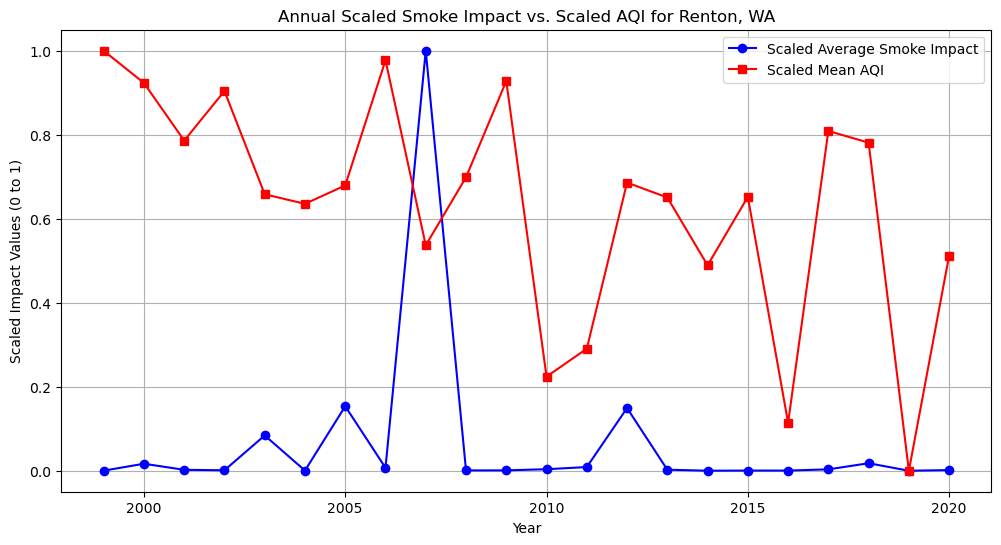

In [202]:
from sklearn.preprocessing import MinMaxScaler

df_smoke = df_subset.groupby('attributes_Fire_Year')['smoke_impact'].mean().reset_index()
df_smoke.columns = ['Year', 'average_smoke_impact']
df_smoke.set_index('Year', inplace=True)

# Merge the two dataframes to ensure we only have overlapping years
df_combined = df_smoke.join(df_aqi, how='inner')

# Initialize the scaler
scaler = MinMaxScaler()

# Scale both 'average_smoke_impact' and 'mean_AQI' columns to [0, 1]
df_combined[['scaled_smoke_impact', 'scaled_mean_AQI']] = scaler.fit_transform(df_combined[['average_smoke_impact', 'mean_AQI']])

# Plotting the scaled data
plt.figure(figsize=(12, 6))
plt.plot(df_combined.index, df_combined['scaled_smoke_impact'], label='Scaled Average Smoke Impact', color='blue', marker='o')
plt.plot(df_combined.index, df_combined['scaled_mean_AQI'], label='Scaled Mean AQI', color='red', marker='s')

# Adding titles and labels
plt.title('Annual Scaled Smoke Impact vs. Scaled AQI for Renton, WA')
plt.xlabel('Year')
plt.ylabel('Scaled Impact Values (0 to 1)')
plt.legend()
plt.grid(True)
plt.show()

# Creating the model

In [88]:
df_filtered.dtypes

attributes_OBJECTID                          int64
attributes_USGS_Assigned_ID                  int64
attributes_Assigned_Fire_Type               object
attributes_Fire_Year                         int64
attributes_Fire_Polygon_Tier                 int64
attributes_Fire_Attribute_Tiers             object
attributes_GIS_Acres                       float64
attributes_GIS_Hectares                    float64
attributes_Source_Datasets                  object
attributes_Listed_Fire_Types                object
attributes_Listed_Fire_Names                object
attributes_Listed_Fire_Codes                object
attributes_Listed_Fire_IDs                  object
attributes_Listed_Fire_IRWIN_IDs            object
attributes_Listed_Fire_Dates                object
attributes_Listed_Fire_Causes               object
attributes_Listed_Fire_Cause_Class          object
attributes_Listed_Rx_Reported_Acres         object
attributes_Listed_Map_Digitize_Methods      object
attributes_Listed_Notes        

In [133]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

imputer = SimpleImputer(strategy='mean')
df_subset_imputed = pd.DataFrame(imputer.fit_transform(df_subset.select_dtypes(include=[np.number])))
df_subset_imputed.columns = df_subset.select_dtypes(include=[np.number]).columns
df_subset_imputed.index = df_subset.index


X = df_subset_imputed.drop(columns=['smoke_impact'])
y = df_subset_imputed['smoke_impact']



In [134]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a pipeline for scaling and modeling
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))  # RandomForestRegressor
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict smoke impact on the test data
y_pred = pipeline.predict(X_test)

# Print out the first few predictions to verify
print("Sample Predictions:", y_pred[:5])

# Optional: Evaluate the model
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

Sample Predictions: [ 0.05761199  0.16798308  1.55954214  0.32868806 48.41695659]
Root Mean Squared Error: 15.13193326002445


In [95]:
future_predictions

array([16.83363925, 16.83363925, 16.83363925, 16.83363925, 16.83363925,
       16.83363925, 16.83363925, 16.83363925, 16.83363925, 16.83363925,
       16.83363925, 16.83363925, 16.83363925, 16.83363925, 16.83363925,
       16.83363925, 16.83363925, 16.83363925, 16.83363925, 16.83363925,
       16.83363925, 16.83363925, 16.83363925, 16.83363925, 16.83363925,
       16.83363925])

In [96]:
correlation_matrix = df_filtered.corr()
print(correlation_matrix['smoke_impact'].sort_values(ascending=False))


smoke_impact                       1.000000
attributes_Shape_Length            0.919969
attributes_GIS_Acres               0.877056
attributes_Shape_Area              0.877056
attributes_GIS_Hectares            0.877056
attributes_OBJECTID               -0.130719
attributes_USGS_Assigned_ID       -0.130719
attributes_Fire_Year              -0.178290
shortest_distance_to_baltimore    -0.262402
shortest_distance_to_renton       -0.262402
attributes_Circleness_Scale       -0.395515
attributes_Fire_Polygon_Tier            NaN
attributes_Fire_Attribute_Tiers         NaN
attributes_Circle_Flag                  NaN
Name: smoke_impact, dtype: float64


/var/folders/p8/09r2qr956s5d5st07s90ws340000gn/T/ipykernel_15264/1809071952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_filtered.corr()


In-sample Root Mean Squared Error: 3.5459610667683994


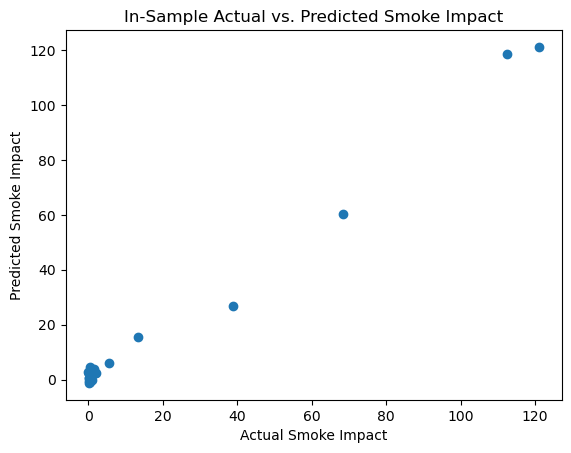

In [97]:
from sklearn.metrics import mean_squared_error

# In-sample predictions
y_pred_in_sample = model.predict(X_train)
rmse_in_sample = np.sqrt(mean_squared_error(y_train, y_pred_in_sample))
print("In-sample Root Mean Squared Error:", rmse_in_sample)

# Plot actual vs predicted values for training data
plt.scatter(y_train, y_pred_in_sample)
plt.xlabel('Actual Smoke Impact')
plt.ylabel('Predicted Smoke Impact')
plt.title('In-Sample Actual vs. Predicted Smoke Impact')
plt.show()


# Visualizations

In [65]:
df_annual_filtered = df_annual[df_annual['shortest_distance_to_renton'] <= 1800]
df_filtered.shape

(39, 36)

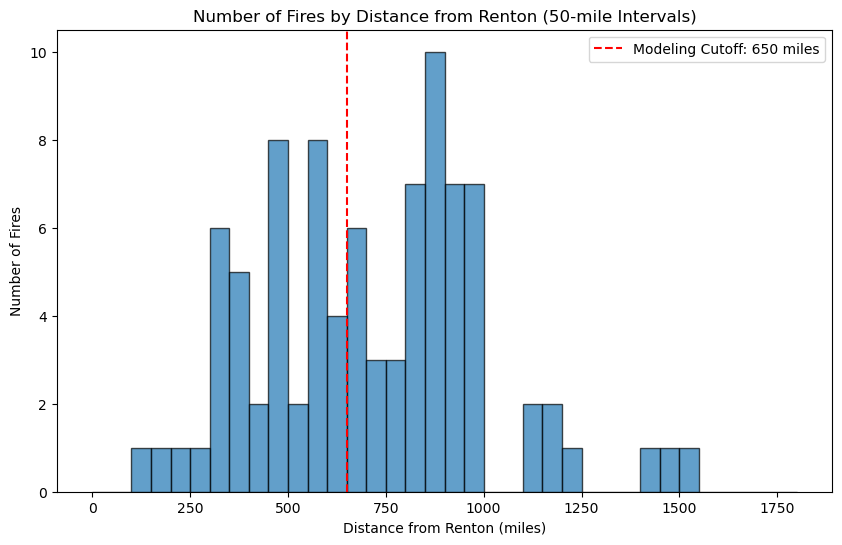

In [206]:
import matplotlib.pyplot as plt


distance_cutoff = 650  


bins = list(range(0, 1801, 50))

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df_subset['shortest_distance_to_renton'], bins=bins, edgecolor='black', alpha=0.7)
plt.axvline(x=distance_cutoff, color='red', linestyle='--', linewidth=1.5, label=f'Modeling Cutoff: {distance_cutoff} miles')


plt.xlabel('Distance from Renton (miles)')
plt.ylabel('Number of Fires')
plt.title('Number of Fires by Distance from Renton (50-mile Intervals)')
plt.legend()

# Show the plot
plt.show()


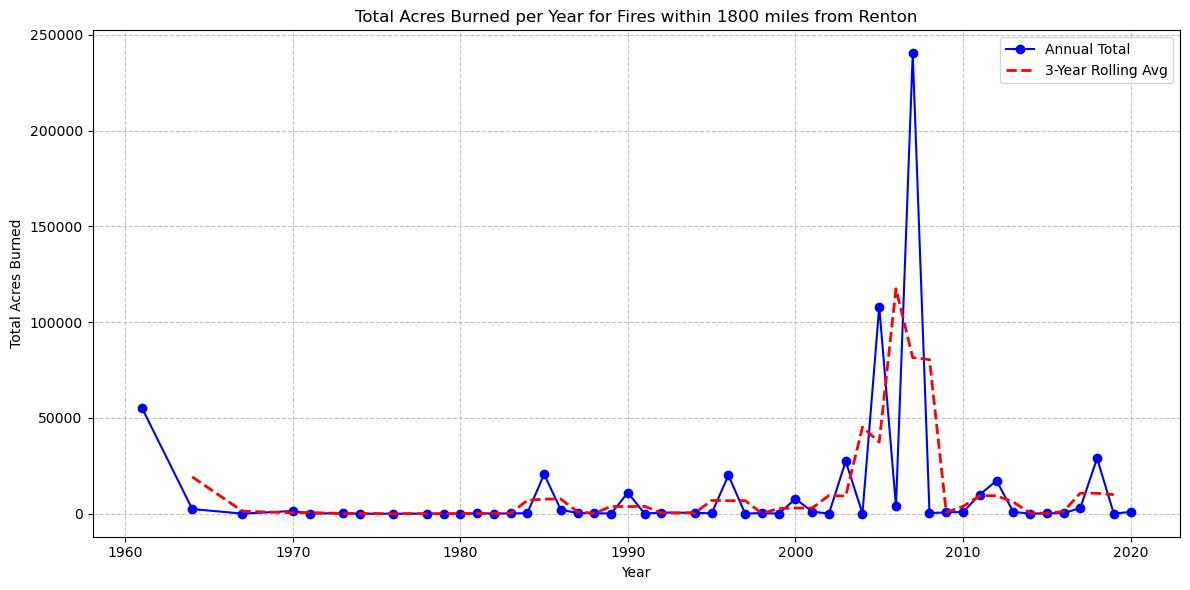

In [207]:

max_distance = 1800
bin_width = 50
bins = range(0, max_distance + bin_width, bin_width)

# Ensure df_subset is within distance range first
df_subset = df_subset[df_subset['shortest_distance_to_renton'] <= max_distance]

acres_burned_per_year = df_subset.groupby('attributes_Fire_Year')['attributes_GIS_Acres'].sum()

acres_burned_per_year_smoothed = acres_burned_per_year.rolling(window=3, center=True).mean()

plt.figure(figsize=(12, 6))
plt.plot(acres_burned_per_year.index, acres_burned_per_year, marker='o', label='Annual Total', color='blue', linewidth=1.5)
plt.plot(acres_burned_per_year.index, acres_burned_per_year_smoothed, linestyle='--', color='red', linewidth=2, label='3-Year Rolling Avg')

# Customize appearance
plt.title('Total Acres Burned per Year for Fires within 1800 miles from Renton')
plt.xlabel('Year')
plt.ylabel('Total Acres Burned')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
